# PART 1 - PRELIMINARIES

## (a) Importing all necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## (b) Loading the dataset

In [2]:
originalDataSet = pd.read_csv('houses_data.csv')

## (c) Exploring the dataset

Let's explore the dataset a little:

In [3]:
originalDataSet.shape

(1460, 81)

In [4]:
originalDataSet.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
originalDataSet.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
originalDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# PART 2 - CLEANING THE DATASET

## (a) Getting rid of all NaN values

Now that we have loaded and inspected our dataset, let's check for any columns that have NaN values (we will replace these NaN values shortly):

In [7]:
originalDataSet.columns[originalDataSet.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

We will replace all NaN values with 0s:

In [8]:
originalDataSet = originalDataSet.replace(np.nan, 0)

Now checking that no NaN values are left:

In [9]:
originalDataSet.columns[originalDataSet.isnull().any()]

Index([], dtype='object')

## (b) Special case

Despite our best efforts later on to discard 'object'-typed data and keep nothing but numeric-type data (see below), we have noticed that the string value 'Grvl', present in certain cells in both 'Street' and 'Alley' columns of the data set (53 cells, to be exact, found by doing Ctrl-F inside the excel sheet itself ---> attach screenshot!!) never disappears.

We have therefore taken the decision to replace this 'Grvl' with the integer value "1", since all columns containg string values will soon be discarded.

Link:

https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers

In [10]:
mymap = {'Grvl':"1", 'Pave':"1"}

originalDataSet.applymap(lambda s: mymap.get(s) if s in mymap else s)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,1,0,IR1,Lvl,AllPub,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,1,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,1,0,IR1,Lvl,AllPub,...,0,0,0,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,1,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,1,0,Reg,Lvl,AllPub,...,0,0,0,0,0,1,2008,WD,Normal,118000


## (c) Discarding all non-numeric values

Now let’s do some filtering to extract only the columns containing numeric-based values from the dataset:

In [11]:
str_list = []

for colname, colvalue in originalDataSet.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
        
num_list = originalDataSet.columns.difference(str_list)

We can now replace our initial dataset ("originalDataSet") with  new one ("cleansedDataSet") which will now only contain numeric-type values:

In [12]:
cleansedDataSet = originalDataSet[num_list]

Investigating this new dataset a little:

In [13]:
cleansedDataSet.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,PoolArea,PoolQC,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,0,3,706,0,1,0,150,...,0,0,208500,0,8,856,0,2003,2003,2008
1,1262,0,0,0,3,978,0,0,1,284,...,0,0,181500,0,6,1262,298,1976,1976,2007
2,920,866,0,0,3,486,0,1,0,434,...,0,0,223500,0,6,920,0,2001,2002,2008
3,961,756,0,0,3,216,0,1,0,540,...,0,0,140000,0,7,756,0,1915,1970,2006
4,1145,1053,0,0,4,655,0,1,0,490,...,0,0,250000,0,9,1145,192,2000,2000,2008


In [14]:
cleansedDataSet.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,PoolArea,PoolQC,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1455,953,694,0,0,3,0,0,0,0,953,...,0,0,175000,0,7,953,0,1999,2000,2007
1456,2073,0,0,0,3,790,163,1,0,589,...,0,0,210000,0,7,1542,349,1978,1988,2010
1457,1188,1152,0,0,4,275,0,0,0,877,...,0,0,266500,0,9,1152,0,1941,2006,2010
1458,1078,0,0,0,2,49,1029,1,0,0,...,0,0,142125,0,5,1078,366,1950,1996,2010
1459,1256,0,0,0,3,830,290,1,0,136,...,0,0,147500,0,6,1256,736,1965,1965,2008


In [15]:
cleansedDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
Alley            1460 non-null object
BedroomAbvGr     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
BsmtUnfSF        1460 non-null int64
EnclosedPorch    1460 non-null int64
Fence            1460 non-null object
Fireplaces       1460 non-null int64
FullBath         1460 non-null int64
GarageArea       1460 non-null int64
GarageCars       1460 non-null int64
GarageYrBlt      1460 non-null float64
GrLivArea        1460 non-null int64
HalfBath         1460 non-null int64
Id               1460 non-null int64
KitchenAbvGr     1460 non-null int64
LotArea          1460 non-null int64
LotFrontage      1460 non-null float64
LowQualFinSF     1460 non-null int64

## (d) Dropping all remaining and unnecessary string-based columns

As we can see in the results above, there are still a few columns that are not integer-typed (so far, we cannot find the reason why they should persist).

Having opened the Excel spreadsheet, we have come to realise that the following columns:

Alley
Fence
PoolQC

...are string-typed (and for some reason, haven't been dropped in the previous process...).

These will need to be dropped:

In [16]:
cleansedDataSet = cleansedDataSet.drop(['Alley','PoolQC','Fence', 'MiscFeature'], axis=1)

In [17]:
cleansedDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
BedroomAbvGr     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
BsmtUnfSF        1460 non-null int64
EnclosedPorch    1460 non-null int64
Fireplaces       1460 non-null int64
FullBath         1460 non-null int64
GarageArea       1460 non-null int64
GarageCars       1460 non-null int64
GarageYrBlt      1460 non-null float64
GrLivArea        1460 non-null int64
HalfBath         1460 non-null int64
Id               1460 non-null int64
KitchenAbvGr     1460 non-null int64
LotArea          1460 non-null int64
LotFrontage      1460 non-null float64
LowQualFinSF     1460 non-null int64
MSSubClass       1460 non-null int64
MasVnrArea       1460 non-null float64

## (e) Convert all INT values to FLOAT

As a final process, we shall convert all INT to FLOAT (needed?).

Link: https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas

Why do we do so? Simply because PCA is desinged for continuous variables. It tries to minimize variance (=squared deviations). The concept of squared deviations breaks down when you have binary variables.

https://stackoverflow.com/questions/40795141/pca-for-categorical-features

In [18]:
# technique 1:
arrConvertValues = ['1stFlrSF',
                    '2ndFlrSF',
                    '3SsnPorch',
                    'BedroomAbvGr',
                    'BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtFullBath',
                    'BsmtHalfBath',
                    'BsmtUnfSF',
                    'EnclosedPorch',
                    'Fireplaces',
                    'FullBath',
                    'GarageArea',
                    'GarageCars',
                    'GrLivArea',
                    'HalfBath',
                    'Id',
                    'KitchenAbvGr',
                    'LotArea',
                    'LowQualFinSF',
                    'MSSubClass',
                    'MiscVal',
                    'MoSold',
                    'OpenPorchSF',
                    'OverallCond',
                    'OverallQual',
                    'PoolArea',
                    'SalePrice',
                    'ScreenPorch',
                    'TotRmsAbvGrd',
                    'TotalBsmtSF',
                    'WoodDeckSF',
                    'YearBuilt',
                    'YearRemodAdd',
                    'YrSold']

for x in arrConvertValues:
    cleansedDataSet[x] = cleansedDataSet[x].astype(float)


Checking the data from our latest dataset one last time:

In [19]:
cleansedDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
3SsnPorch        1460 non-null float64
BedroomAbvGr     1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
BsmtUnfSF        1460 non-null float64
EnclosedPorch    1460 non-null float64
Fireplaces       1460 non-null float64
FullBath         1460 non-null float64
GarageArea       1460 non-null float64
GarageCars       1460 non-null float64
GarageYrBlt      1460 non-null float64
GrLivArea        1460 non-null float64
HalfBath         1460 non-null float64
Id               1460 non-null float64
KitchenAbvGr     1460 non-null float64
LotArea          1460 non-null float64
LotFrontage      1460 non-null float64
LowQualFinSF     1460 non-null float64
MSSubClass       1460 non-null floa

# PART 3 - THE "SALEPRICE" COLUMN

## (a) Viewing the column's values

From exploring the data, we notice an interesting column: SALEPRICE

In [20]:
print(cleansedDataSet['SalePrice'])

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1430    192140.0
1431    143750.0
1432     64500.0
1433    186500.0
1434    160000.0
1435    174000.0
1436    120500.0
1437    394617.0
1438    149700.0
1439    197000.0
1440    191000.0
1441    149300.0
1442    310000.0
1443    121000.0
1444    179600.0
1445    129000.0
1446    157900.0
1447    240000.0
1448    112000.0
1449     92000.0
1450    136000.0
1451    287090.0
1452    145000.0
1453     84500.0
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500

Let's sort the house prices, from lowest to highest:

In [21]:
cleansedDataSet.sort_values(by='SalePrice')

# We see that house prices range from 34,900$ to 755,000$

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
495,720.0,0.0,0.0,2.0,495.0,0.0,0.0,0.0,225.0,115.0,...,4.0,0.0,34900.0,0.0,4.0,720.0,0.0,1920.0,1950.0,2009.0
916,480.0,0.0,0.0,1.0,50.0,0.0,1.0,0.0,430.0,0.0,...,2.0,0.0,35311.0,0.0,4.0,480.0,0.0,1949.0,1950.0,2006.0
968,600.0,368.0,0.0,2.0,0.0,0.0,0.0,0.0,600.0,0.0,...,3.0,0.0,37900.0,0.0,6.0,600.0,0.0,1910.0,1950.0,2009.0
533,334.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,39300.0,0.0,2.0,0.0,0.0,1946.0,1950.0,2007.0
30,649.0,668.0,0.0,3.0,0.0,0.0,0.0,0.0,649.0,172.0,...,4.0,0.0,40000.0,0.0,6.0,649.0,0.0,1920.0,1950.0,2008.0
710,729.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,270.0,0.0,...,3.0,0.0,52000.0,0.0,5.0,270.0,0.0,1935.0,2003.0,2008.0
1337,693.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,693.0,0.0,...,4.0,0.0,52500.0,0.0,4.0,693.0,0.0,1941.0,1950.0,2006.0
705,372.0,720.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,55000.0,0.0,7.0,0.0,0.0,1930.0,1950.0,2010.0
1325,796.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,796.0,100.0,...,4.0,0.0,55000.0,0.0,5.0,796.0,0.0,1922.0,1950.0,2008.0
812,1044.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,540.0,0.0,...,5.0,0.0,55993.0,0.0,4.0,540.0,0.0,1952.0,1952.0,2010.0


## (b) Viewing distribution of SALEPRICE values on a chart

Let's visualize how this SALEPRICE data is distributed:

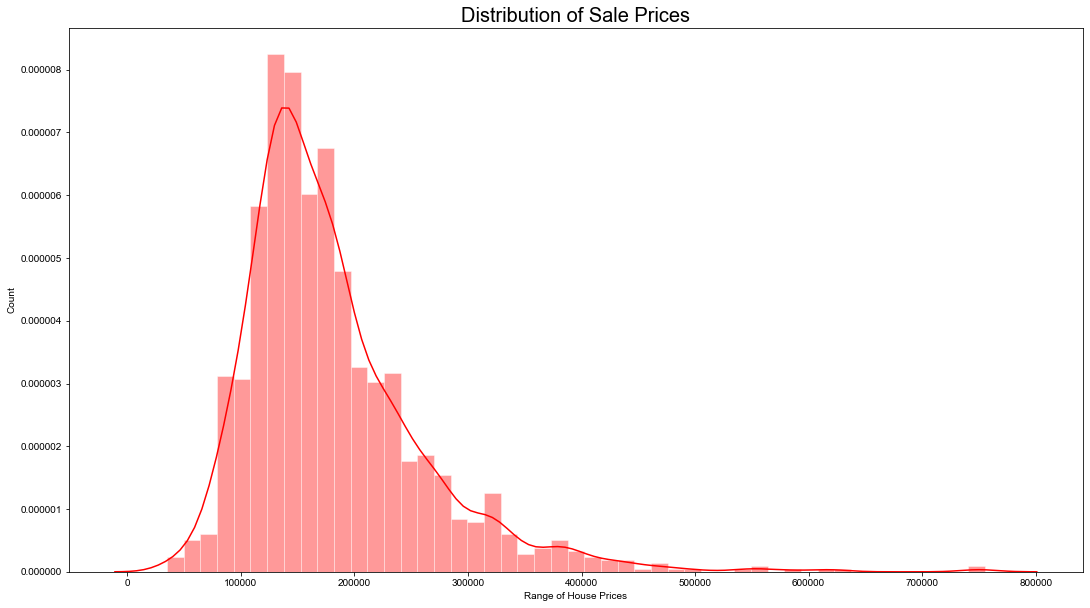

In [22]:
fig= plt.figure(figsize=(40,10))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(cleansedDataSet['SalePrice'], color = 'red')
plt.title('Distribution of Sale Prices', fontsize = 20)
plt.xlabel('Range of House Prices')
plt.ylabel('Count')
plt.show()

## (c) Getting the median & average & max of SALEPRICE values

Let's find the median of all the house sale prices:

In [23]:
import statistics
theMedian = statistics.median(cleansedDataSet['SalePrice'])

print(theMedian)

163000.0


NOTE: the result given here (163,000) is different from the one I obtained in the Excel spreadsheet itself (by
using the following formula in a blank cell: =MEDIAN(CC1, CC1461), which gave me 147,500!)

Now, let's also calculate the average price of all these houses:

In [24]:
def Average(lst): 
    return sum(lst) / len(lst) 

lst=cleansedDataSet['SalePrice']
theAverage = Average(lst) 
  
print("Average of the list =", round(theAverage, 2))

Average of the list = 180921.2


Finally, getting the max value of all these house sale prices:

In [25]:
maxPrice = cleansedDataSet['SalePrice'].max()

print(maxPrice)

755000.0


## (d) Viewing percentage split of SALEPRICE values based on the median

Code for pie chart found here:

https://stackoverflow.com/questions/54379345/i-want-to-create-a-pie-chart-using-a-dataframe-column-in-python

In [26]:
salesSplitFromMedian = pd.DataFrame(cleansedDataSet['SalePrice'])
# print(salesSplitFromMedian)

In [27]:
salesSplitFromMedian['SALE PRICES SPLIT FROM MEDIAN'] = pd.cut(salesSplitFromMedian['SalePrice'], 
                                                        bins=[0, theMedian, maxPrice],
                                                        labels=['0-163000.0(median)','163000.0(median)-755000.0(max price)'], 
                                                        right=True)

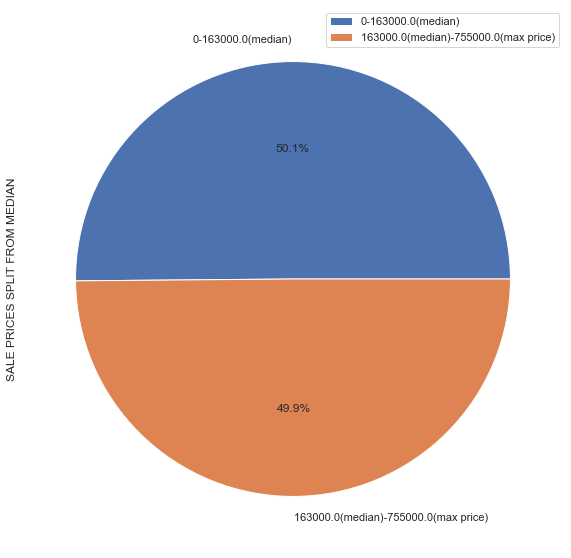

In [28]:
bin_percent_median = pd.DataFrame(salesSplitFromMedian['SALE PRICES SPLIT FROM MEDIAN'].value_counts(normalize=True) * 100)
plot = bin_percent_median.plot.pie(y='SALE PRICES SPLIT FROM MEDIAN', figsize=(10, 10), autopct='%1.1f%%')

## (e) Viewing percentage split of SALEPRICE values based on the average

In [29]:
salesSplitFromAverage = pd.DataFrame(cleansedDataSet['SalePrice'])
# print(salesSplitFromMedian)

In [30]:
salesSplitFromAverage['SALE PRICES SPLIT FROM AVERAGE'] = pd.cut(salesSplitFromAverage['SalePrice'], 
                                                        bins=[0, theAverage, maxPrice],
                                                        labels=['0-180921.2(average)','180921.2(average)-755000.0(max price)'], 
                                                        right=True)

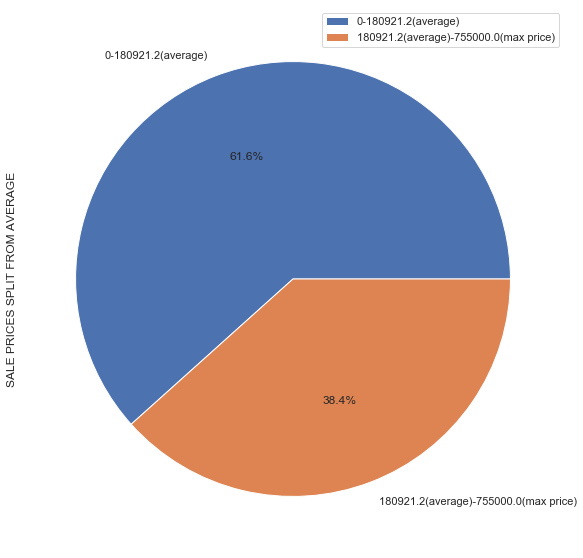

In [31]:
bin_percent_average = pd.DataFrame(salesSplitFromAverage['SALE PRICES SPLIT FROM AVERAGE'].value_counts(normalize=True) * 100)
plot = bin_percent_average.plot.pie(y='SALE PRICES SPLIT FROM AVERAGE', figsize=(10, 10), autopct='%1.1f%%')

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# PART 3b - Attempt to standardize / MinMax data

Normally at this stage we would proceed to standardize (or "minmax") our data.

This is an important step, since failing to do so could result in having unequal weights in our distance computation (more on this in the report).

However, as we shall demonstrate below, proceeding to standardize or "minmax" the data will in either case result in still having a very high data dimensionality (going from the initial 38 dimensions down to only 35...).

It is why we have sadly skipped this step.

------------------------------------------------------------

---> TALK ABOUT THIS MORE AT LENGTH IN THE REPORT ITSELF (use notes below)

(Reasons for data normalization are explained here:https://www.import.io/post/what-is-data-normalization-and-why-is-it-important

Also here: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

## (a) Standardizing data

In [32]:
X = cleansedDataSet.values
from sklearn.preprocessing import StandardScaler
standardizedDataSet = StandardScaler().fit_transform(X)

Below: a quick comparison between the initial cleansed dataset structure & contents and the standardized dataset structure & contents:

In [33]:
cleansedDataSet.shape

(1460, 38)

In [34]:
standardizedDataSet.shape

(1460, 38)

In [35]:
cleansedDataSet

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,7.0,0.0,208500.0,0.0,8.0,856.0,0.0,2003.0,2003.0,2008.0
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,6.0,0.0,181500.0,0.0,6.0,1262.0,298.0,1976.0,1976.0,2007.0
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,7.0,0.0,223500.0,0.0,6.0,920.0,0.0,2001.0,2002.0,2008.0
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,7.0,0.0,140000.0,0.0,7.0,756.0,0.0,1915.0,1970.0,2006.0
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,8.0,0.0,250000.0,0.0,9.0,1145.0,192.0,2000.0,2000.0,2008.0
5,796.0,566.0,320.0,1.0,732.0,0.0,1.0,0.0,64.0,0.0,...,5.0,0.0,143000.0,0.0,5.0,796.0,40.0,1993.0,1995.0,2009.0
6,1694.0,0.0,0.0,3.0,1369.0,0.0,1.0,0.0,317.0,0.0,...,8.0,0.0,307000.0,0.0,7.0,1686.0,255.0,2004.0,2005.0,2007.0
7,1107.0,983.0,0.0,3.0,859.0,32.0,1.0,0.0,216.0,228.0,...,7.0,0.0,200000.0,0.0,7.0,1107.0,235.0,1973.0,1973.0,2009.0
8,1022.0,752.0,0.0,2.0,0.0,0.0,0.0,0.0,952.0,205.0,...,7.0,0.0,129900.0,0.0,8.0,952.0,90.0,1931.0,1950.0,2008.0
9,1077.0,0.0,0.0,2.0,851.0,0.0,1.0,0.0,140.0,0.0,...,5.0,0.0,118000.0,0.0,5.0,991.0,0.0,1939.0,1950.0,2008.0


In [36]:
standardizedDataSet

array([[-0.79343379,  1.16185159, -0.11633929, ...,  1.05099379,
         0.87866809,  0.13877749],
       [ 0.25714043, -0.79516323, -0.11633929, ...,  0.15673371,
        -0.42957697, -0.61443862],
       [-0.62782603,  1.18935062, -0.11633929, ...,  0.9847523 ,
         0.83021457,  0.13877749],
       ...,
       [ 0.06565646,  1.84474434, -0.11633929, ..., -1.00249232,
         1.02402865,  1.64520971],
       [-0.21898188, -0.79516323, -0.11633929, ..., -0.70440562,
         0.53949344,  1.64520971],
       [ 0.2416147 , -0.79516323, -0.11633929, ..., -0.20759447,
        -0.96256569,  0.13877749]])

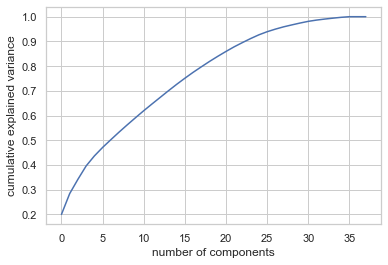

In [37]:
from sklearn.decomposition import PCA
std_pca = PCA().fit(standardizedDataSet)
plt.plot(np.cumsum(std_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

AS we can observe from the graph above, the tipping point in the "elbow curve" above is at 35.

We will therefore transform our initial dataset to a 35-component PCA-transformed dataset (which is absolutely not ideal):

In [38]:
pca_1 = PCA(n_components=35)
transformedSet_1 = pca_1.fit_transform(standardizedDataSet)

print("standardized dataset contents (rows/columns):   ", standardizedDataSet.shape)
print("transformed dataset contents (rows/columns):  ", transformedSet_1.shape)

standardized dataset contents (rows/columns):    (1460, 38)
transformed dataset contents (rows/columns):   (1460, 35)


From these inappropriate figures we've obtained above, juxtaposing the plotting of the initial and PCA-transformed datasets will naturally produce a flawed diagram, as that shown below:

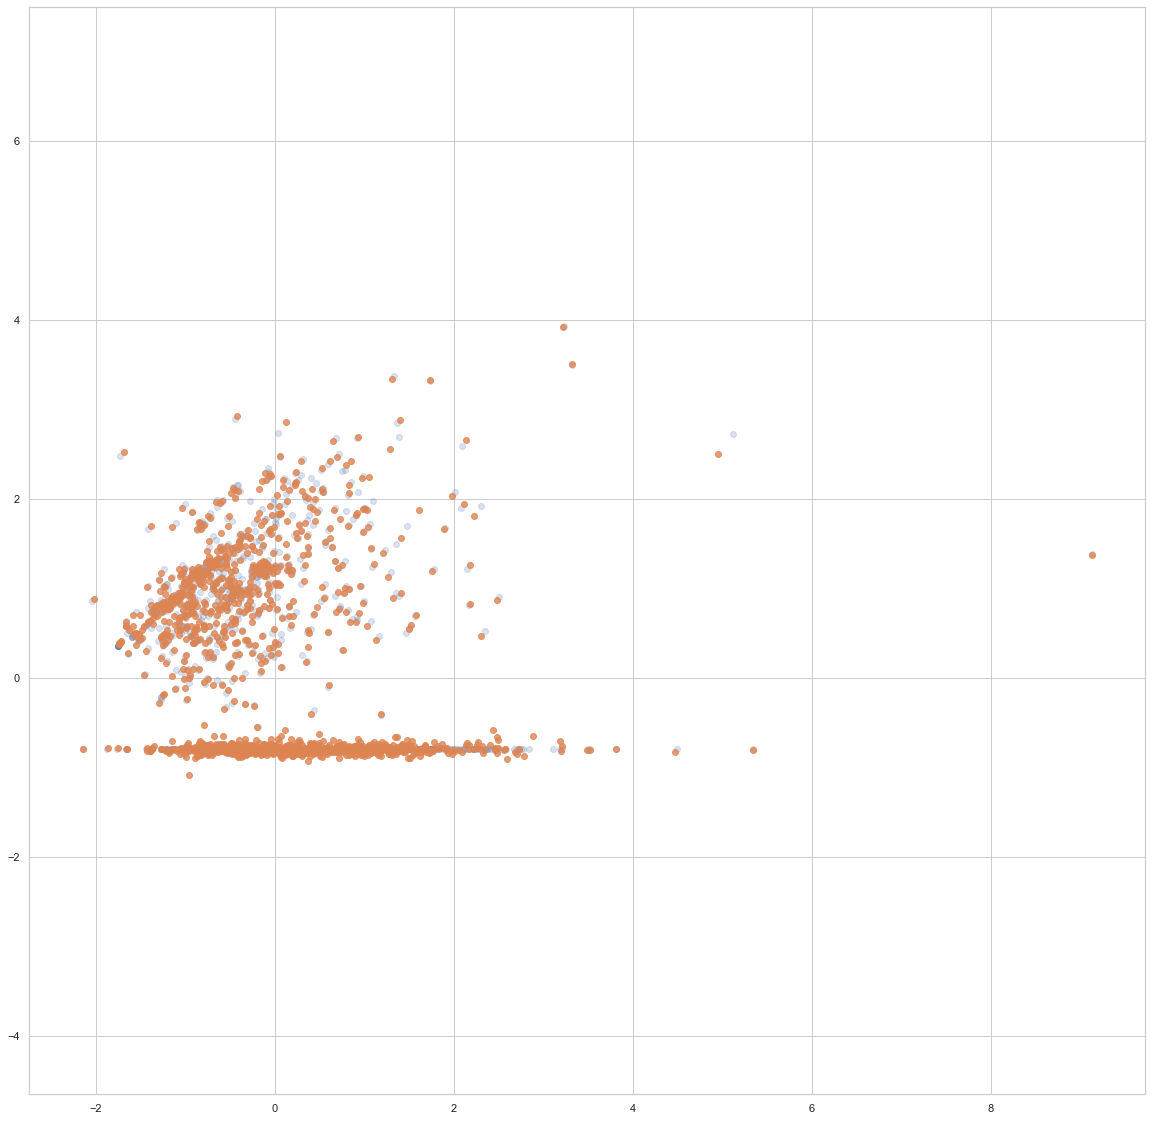

In [39]:
fig= plt.figure(figsize=(20,20))
transData_1 = pca_1.inverse_transform(transformedSet_1)
plt.scatter(standardizedDataSet[:, 0], standardizedDataSet[:, 1], alpha=0.2)
plt.scatter(transData_1[:, 0], transData_1[:, 1], alpha=0.8)
plt.axis('equal');

## (b) MinMax-ing data

In [40]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X = cleansedDataSet.values
minMaxedDataSet = mm_scaler.fit_transform(X)
mm_scaler.transform(X)

array([[0.11977972, 0.41355932, 0.        , ..., 0.94927536, 0.88333333,
        0.5       ],
       [0.21294172, 0.        , 0.        , ..., 0.75362319, 0.43333333,
        0.25      ],
       [0.13446535, 0.41937046, 0.        , ..., 0.93478261, 0.86666667,
        0.5       ],
       ...,
       [0.19596145, 0.55786925, 0.        , ..., 0.5       , 0.93333333,
        1.        ],
       [0.17072051, 0.        , 0.        , ..., 0.56521739, 0.76666667,
        1.        ],
       [0.21156494, 0.        , 0.        , ..., 0.67391304, 0.25      ,
        0.5       ]])

In [41]:
minMaxedDataSet.shape

(1460, 38)

In [42]:
minMaxedDataSet

array([[0.11977972, 0.41355932, 0.        , ..., 0.94927536, 0.88333333,
        0.5       ],
       [0.21294172, 0.        , 0.        , ..., 0.75362319, 0.43333333,
        0.25      ],
       [0.13446535, 0.41937046, 0.        , ..., 0.93478261, 0.86666667,
        0.5       ],
       ...,
       [0.19596145, 0.55786925, 0.        , ..., 0.5       , 0.93333333,
        1.        ],
       [0.17072051, 0.        , 0.        , ..., 0.56521739, 0.76666667,
        1.        ],
       [0.21156494, 0.        , 0.        , ..., 0.67391304, 0.25      ,
        0.5       ]])

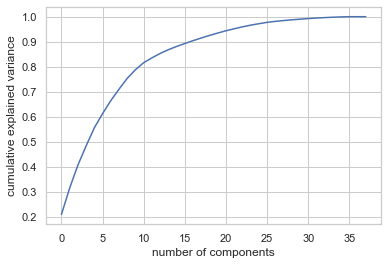

In [43]:
from sklearn.decomposition import PCA
mm_pca = PCA().fit(minMaxedDataSet)
plt.plot(np.cumsum(mm_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [44]:
pca_2 = PCA(n_components=10)
transformedSet_2 = pca_2.fit_transform(minMaxedDataSet)

print("minmax-ed dataset contents (rows/columns):   ", minMaxedDataSet.shape)
print("transformed dataset contents (rows/columns):  ", transformedSet_2.shape)

minmax-ed dataset contents (rows/columns):    (1460, 38)
transformed dataset contents (rows/columns):   (1460, 10)


Again, from these inappropriate figures we've obtained above, juxtaposing the plotting of the initial and PCA-transformed datasets will naturally produce a flawed diagram, as that shown below:

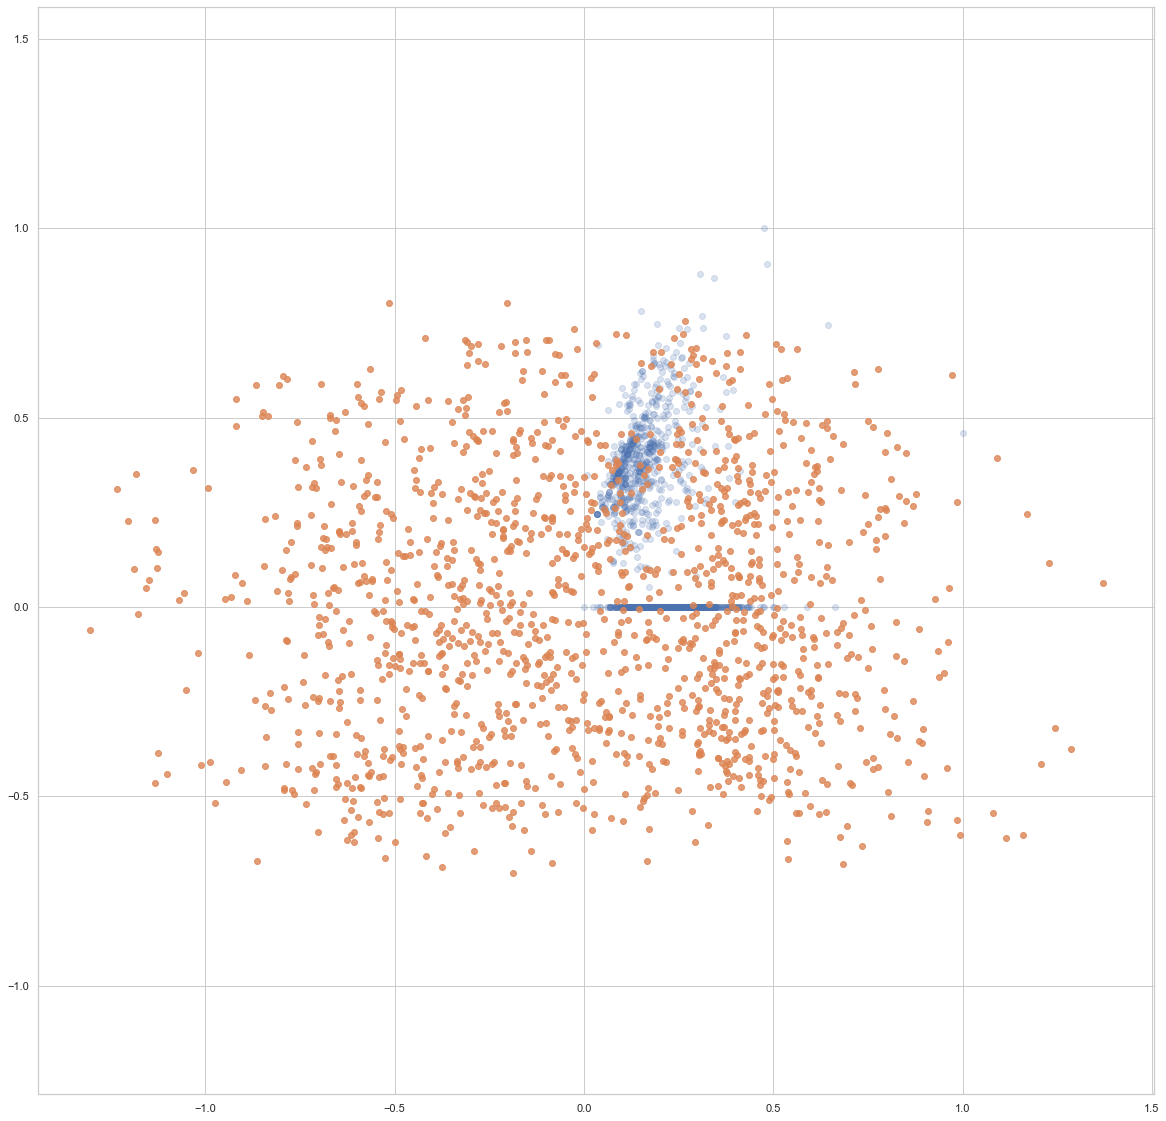

In [45]:
fig= plt.figure(figsize=(20,20))
transData_2 = pca_2.inverse_transform(transformedSet_2)
plt.scatter(minMaxedDataSet[:, 0], minMaxedDataSet[:, 1], alpha=0.2)
plt.scatter(transformedSet_2[:, 0], transformedSet_2[:, 1], alpha=0.8)
plt.axis('equal');

It is for this reason, sadly, that we are omitting the standardization of our data in this coursework.

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# PART 4 - plotting the initial cleansed dataset

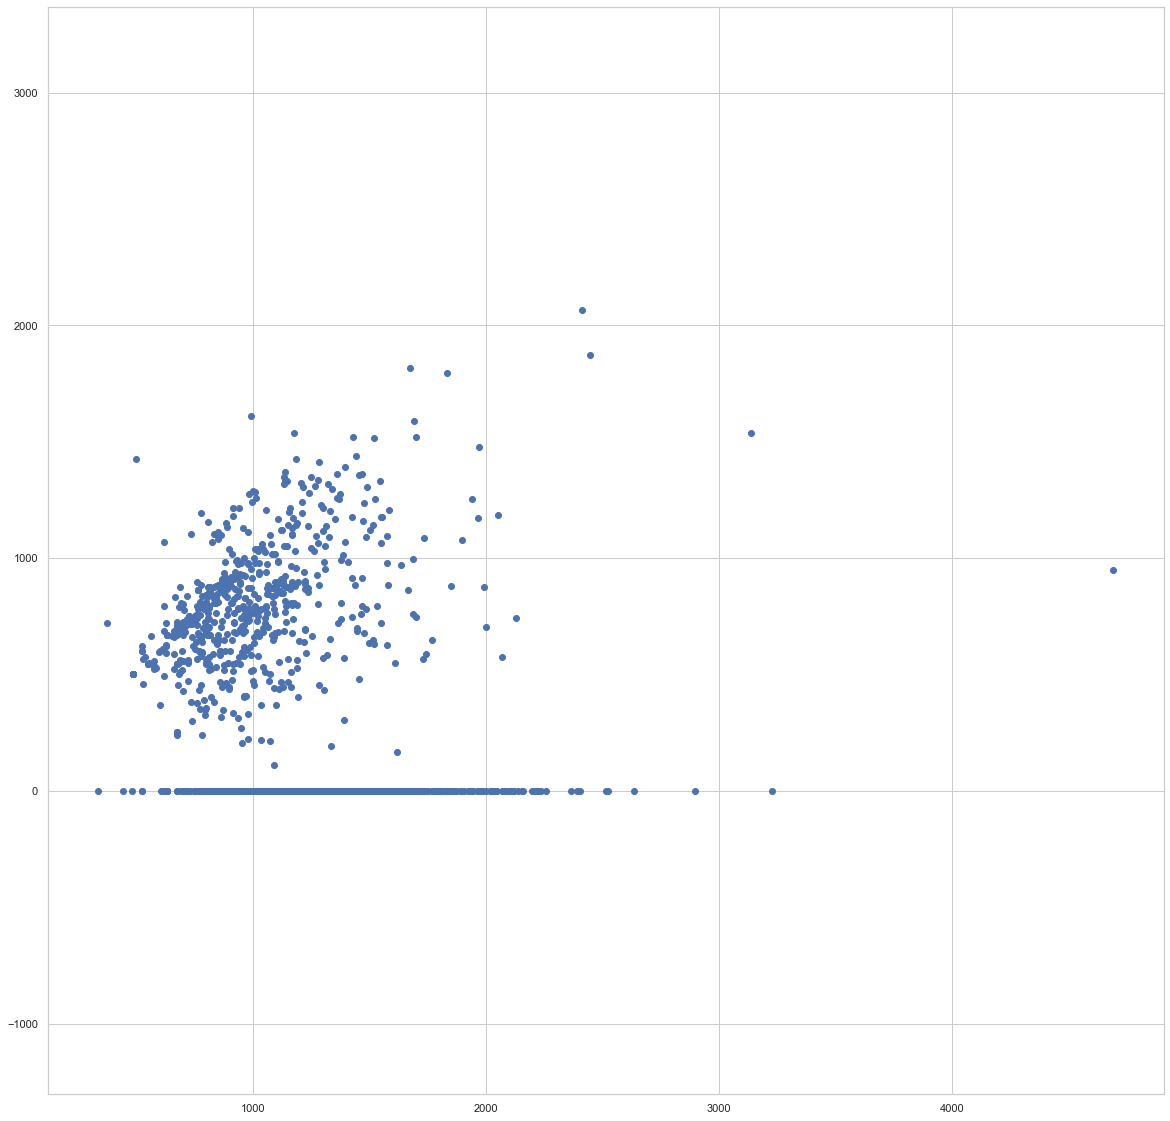

In [46]:
fig= plt.figure(figsize=(20,20))
plt.scatter(cleansedDataSet.to_numpy()[:, 0], cleansedDataSet.to_numpy()[:, 1])
plt.axis('equal');

# PART 5 - implementing PCA

## (a) Scree plot ("elbow curve")

In order to find the number of components for our PCA, we need to implement an "elbow curve" (this is further explained in the report):

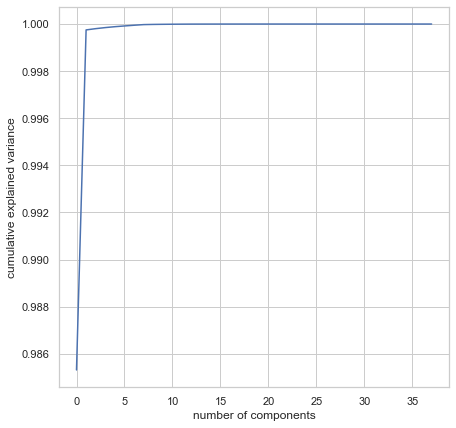

In [47]:
from sklearn.decomposition import PCA
pca = PCA().fit(cleansedDataSet)
fig= plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From this diagram (which we have expanded slightly in order to view the break in the elbow curve more clearly), we can deduce fairly confidently that the dataset can now be reduced to 2 components.

## (b) Setting our initial dataset to PCA-transformed dataset:

In [48]:
pca = PCA(n_components=2)
PCAtransformedDataSet = pca.fit_transform(cleansedDataSet)

## (c) Comparing contents between initial & PCA-transformed datasets:

In [49]:
print("cleansed dataset contents (rows/columns):   ", cleansedDataSet.shape)
print("transformed dataset contents (rows/columns):", PCAtransformedDataSet.shape)

cleansed dataset contents (rows/columns):    (1460, 38)
transformed dataset contents (rows/columns): (1460, 2)


## (d) Printing results from PCA:

In [50]:
PCAtransformedDataSet

array([[ 27493.69399368,  -2993.90189136],
       [   547.88737927,   -929.9797817 ],
       [ 42579.61112687,   -701.90833827],
       ...,
       [ 85483.17061809,  -4350.77299861],
       [-38804.77724313,    506.48036481],
       [-33421.40055582,    550.70973109]])

## (e) Juxtaposing the plotting of both cleansed and PCA-transformed datasets:

The PCA-transformed dataset is in orange, while the cleansed dataset is in blue.

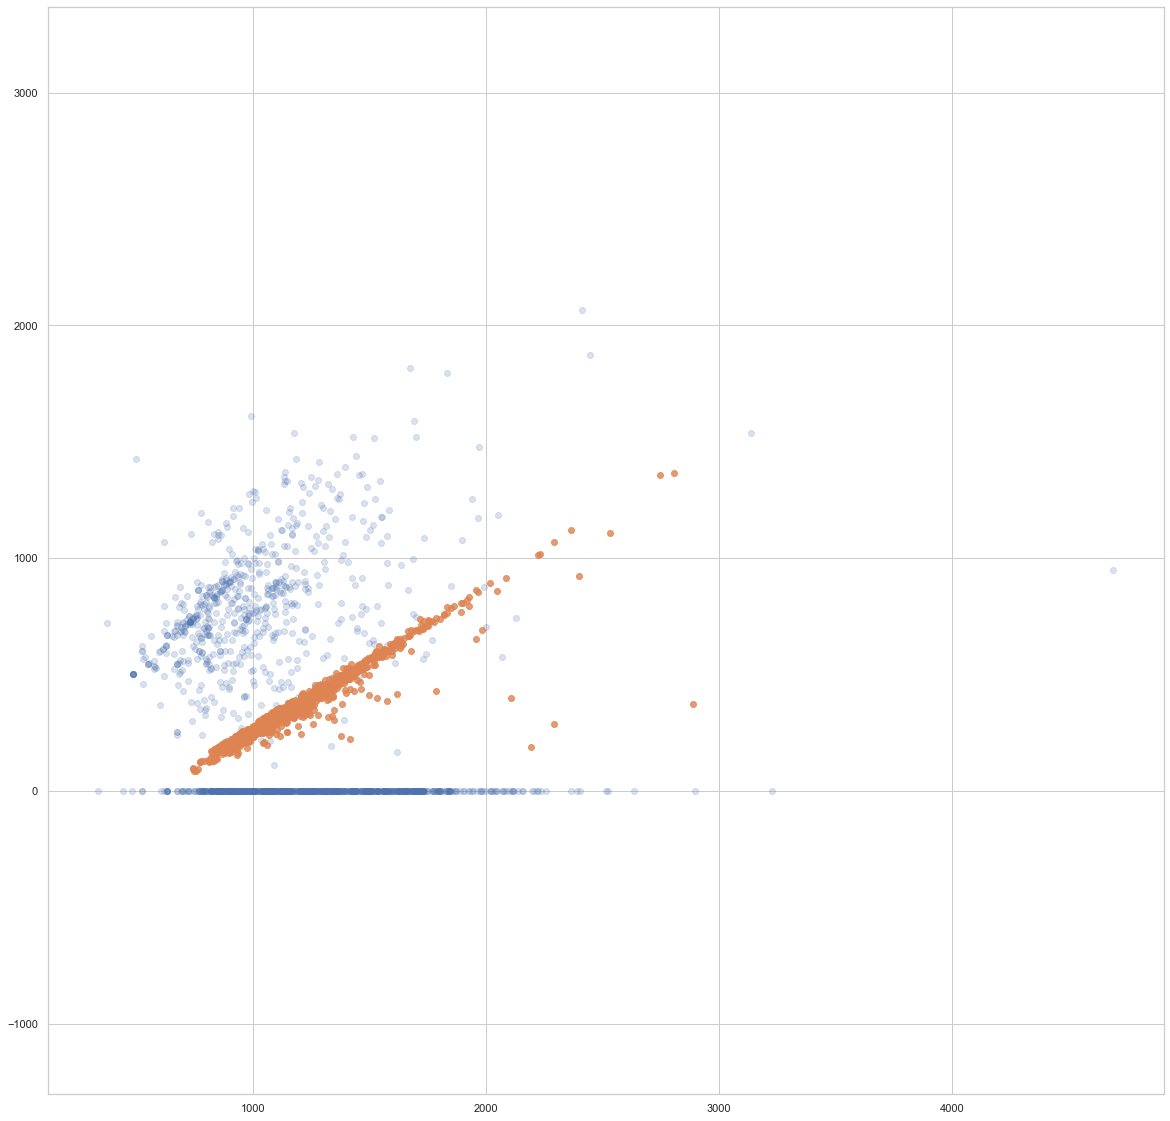

In [51]:
# NOTE (having to change our DataFrame to a numpy array by applying .TO_NUMPY())

fig= plt.figure(figsize=(20,20))
X_new = pca.inverse_transform(PCAtransformedDataSet)
plt.scatter(cleansedDataSet.to_numpy()[:, 0], cleansedDataSet.to_numpy()[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The diagram below re-plots the PCA-transformed dataset onto a normalized graph:

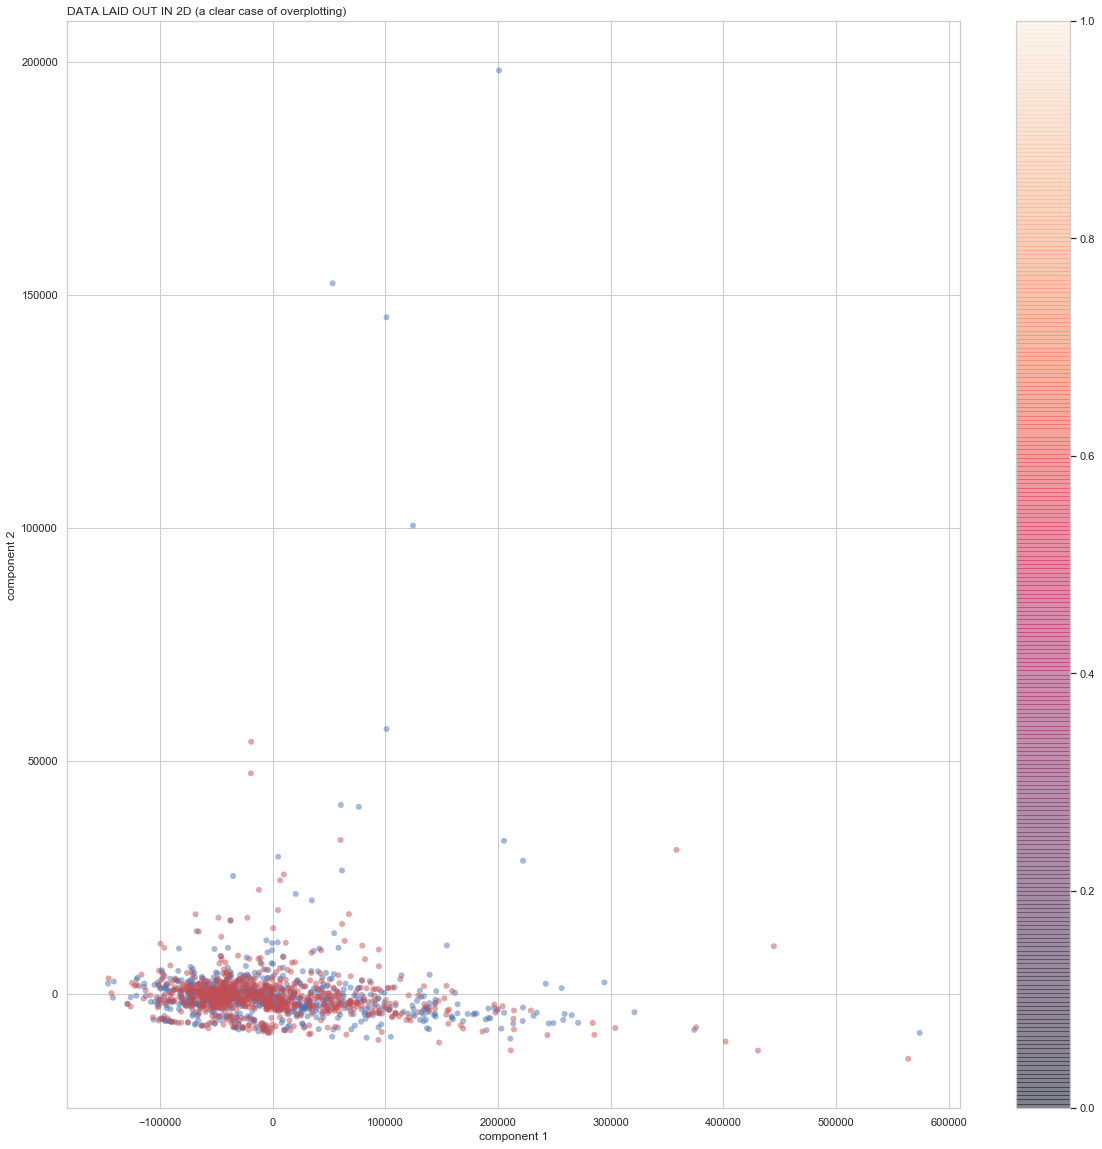

In [52]:
color_array = ['b']*730 + ['r']*730
fig= plt.figure(figsize=(20,20))
plt.scatter(PCAtransformedDataSet[:, 0], PCAtransformedDataSet[:, 1],
            c=color_array, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 100))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('DATA LAID OUT IN 2D (a clear case of overplotting)', loc='left')
plt.colorbar();

# colours available:
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white

## (f) Comparing accuracy scores, from 38 components down to 2 components:

In order for us to verify how accuracy scores do change according to the number of principle components applied to the initial dataset, we will apply an early classification algorithm to the PCA-transformed dataset.

For this, we will work with SVM classifiers, as they do a good job of classifying the data depending on the number of dimensions we serve them.

We will start with the full 38 dimensions we obtained from the cleaning the original dataset, then slowly decrease the number of dimensions down to 2 as so: [38, 30, 20, 10, 8, 6, 4, 3, 2]

WE will therefore realise that accuracy in fact ***increases*** as the number of components ***decreases***. 

In [53]:
pca = PCA(38)

X = pca.fit_transform(cleansedDataSet)
y = cleansedDataSet['SalePrice']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.29315068493150687

In [54]:
pca = PCA(30)

X = pca.fit_transform(cleansedDataSet)
y = cleansedDataSet['SalePrice']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.29315068493150687

In [55]:
pca = PCA(20)

X = pca.fit_transform(cleansedDataSet)
y = cleansedDataSet['SalePrice']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.29315068493150687

In [56]:
pca = PCA(10)

X = pca.fit_transform(cleansedDataSet)
y = cleansedDataSet['SalePrice']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.2958904109589041

In [57]:
pca = PCA(8)

X = pca.fit_transform(cleansedDataSet)
y = cleansedDataSet['SalePrice']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.30684931506849317

In [58]:
pca = PCA(6)

X = pca.fit_transform(cleansedDataSet)
y = cleansedDataSet['SalePrice']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.336986301369863

In [59]:
pca = PCA(4)

X = pca.fit_transform(cleansedDataSet)
y = cleansedDataSet['SalePrice']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.3424657534246575

In [60]:
pca = PCA(3)

X = pca.fit_transform(cleansedDataSet)
y = cleansedDataSet['SalePrice']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.3917808219178082

In [61]:
pca = PCA(2)

X = pca.fit_transform(cleansedDataSet)
y = cleansedDataSet['SalePrice']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.4575342465753425

# PART 6 - clustering the PCA-transformed dataset

In this step, we will use k-means clustering to view both PCA components. 

In order to do this, we will first fit these principal components to the k-means algorithm and determine the best number of clusters. 

Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka inertia (more of this in the report).

Much like the scree plot for PCA seen previously, the k-means scree plot below indicates the percentage of variance explained, but in slightly different terms, as a function of the number of clusters.

## (a) Determining the number of clusters:

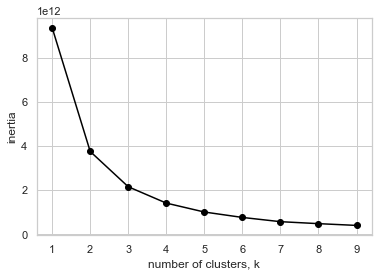

In [62]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCAtransformedDataSet)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## (b) Plotting the clusters (with centroids):

Plotting:

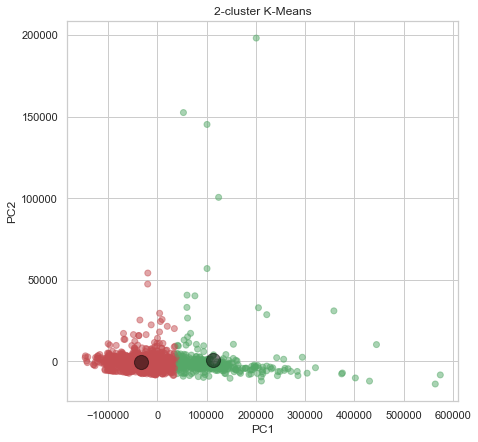

In [63]:
kmeans = KMeans(n_clusters=2)
X_clustered = kmeans.fit_predict(PCAtransformedDataSet)

LABEL_COLOR_MAP = {0 : 'r', 1 : 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

plt.figure(figsize=(7,7))
plt.scatter(PCAtransformedDataSet[:,0],PCAtransformedDataSet[:,1],c=label_color,alpha=0.5)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2-cluster K-Means')

plt.show()

The scree plot above shows some clearly defined clusters in the data. 

Now that we know how many clusters there are in our data, we have a better sense of how many groups we can label the PCA-transformed dataset with. 

It is certainly our intentions to implement with a model that grades house sale prices in the dataset based on two classes: EXPENSIVE and AFFORDABLE. 

Introducing these labels back into the reduced dataset on the unique id of each sample would allow us to visualize them by cluster.

The ability to notice otherwise unseen patterns and to come up with a model to generalize those patterns onto observations is precisely why tools like PCA and k-means are essential in any data scientist’s toolbox. They allow us to see the big picture while we pay attention to the details.

# PART 7 - attempting to classify the clustered, PCA-transformed dataset

We can already pre-test our PCA data for classification purposes (this would be fully implemented *after* having
done clustering...)

from: https://stats.stackexchange.com/questions/144439/applying-pca-to-test-data-for-classification-purposes

PCA is a dimension reduction tool, not a classifier. In Scikit-Learn, all classifiers and estimators have a 
predict method which PCA does not. 
You need to fit a classifier on the PCA-transformed data. Scikit-Learn has many classifiers. 
Here is an example of using a decision tree on PCA-transformed data. I chose the decision tree classifier as 
it works well for data with more than two classes which is the case with the iris dataset.

This can be achieved by using Pipeline.

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# The following fits PCA, transforms the data and fits the decision tree classifier onto the transformed data:

pipe = Pipeline([('pca', PCA()), ('tree', DecisionTreeClassifier())])

pipe.fit(PCAtransformedDataSet, cleansedDataSet['SalePrice'])
pipe.predict(PCAtransformedDataSet)

# pipe.fit(cleansedDataSet, cleansedDataSet['SalePrice'])
# pipe.predict(cleansedDataSet)

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

We need code to transform numpy array (PCAtransformedDataSet) into a dataframe.

Info on how to do so:

https://stackoverflow.com/questions/20763012/creating-a-pandas-dataframe-from-a-numpy-array-how-do-i-specify-the-index-colum

In [65]:
finalDataSet = pd.DataFrame({'expensive': PCAtransformedDataSet[:, 0], 'affordable': PCAtransformedDataSet[:, 1]})

The following requires uploading PYDOTPLUS on Anaconda prompt, as so:

      conda install -c conda-forge pydotplus

(info found here: https://anaconda.org/conda-forge/pydotplus)